# 実習の説明

## これは何か？

Jupyter notebook というRを使うためのインターフェースの一つです。

- Jupyter notebook の簡単な説明（日本語） https://datumstudio.jp/blog/795

特に、今回は JupyterHub という形で（みなさんの手元のPCではなく）オンラインでJupyter notebookを使う環境を提供しています。
これは、講義などで同一の環境でできるのに便利です。


## 何をするか？

非小細胞肺癌 (non-small-cell lung cancer; NSCLC) において、腫瘍組織内に存在する間質細胞から腫瘍細胞にシグナルのクロストークが送って腫瘍が活性化される可能性を探ります。データは、NSCLCモデルマウスと野生型のマウスの肺から、セルソーターで分けたマクロファージ、単球細胞、好中球、上皮細胞のRNA-seqデータです。

> このようなRNA-seqデータを、「変数が全遺伝子、条件が細胞型xマウス（野生型 or 腫瘍）、値が発現量である表」として想像できると、あとの解析がスムーズです

元ネタはこちら: 

- Toi _et al_., Transcriptome Analysis of Individual Stromal Cell Populations Identifies Stroma-Tumor Crosstalk in Mouse Lung Cancer Model, Cell Reports (2015) http://dx.doi.org/10.1016/j.celrep.2015.01.040 

ソフトウェアやアノテーションデータが著者らのウェブページで公開されています。また、NGSデータの生データや処理済みデータはGene Expression Omnibus (GEO)より公開されています。

- ソフトウェアやアノテーションデータ http://209.160.41.231/u54/CCCExplorer/
- Gene Expression Omnibus (GEO)のNGSデータのページ https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE59831

## どうやるか？

腫瘍組織内間質細胞のリガンドから腫瘍細胞の受容体へのシグナルのクロストークがあるとしたら、

- 腫瘍モデルマウスでは野生型に比べ、リガンドが発現上昇しているだろう
- 腫瘍モデルマウスの上皮組織では、そのリガンドの受容体が発現しているだろう

そのようなリガンドと受容体のペアを見つけるのに必要なデータは？

- 既知のリガンド-受容体ペアのデータベース（ヒト）
- ヒト-マウスオーソログの対応表
- 腫瘍組織内間質細胞で発現上昇がみられた遺伝子のリスト
- 腫瘍細胞で発現上昇

それらのデータを組み合わせればよさそう

![image.png](https://ars.els-cdn.com/content/image/1-s2.0-S2211124715000650-fx1.jpg)
(Image from http://dx.doi.org/10.1016/j.celrep.2015.01.040)

# 練習

## パッケージのロード
パッケージ（ライブラリ）を使えるようにするためにロードする

In [1]:
library(readr)
library(dplyr)
library(tidyr)
library(magrittr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘magrittr’

The following object is masked from ‘package:tidyr’:

    extract



In [2]:
# プロットを大きくしすぎない呪文
options(repr.plot.width=4, repr.plot.height=4)

## 発現変動遺伝子のデータをいじくる

ここではマクロファージのデータ (`data/CCCExplorer/CD11CB_output/gene_exp.diff`) を例に、データのいじくりかたをみていきます。

In [3]:
# データの読み込み
deg_macrophage = read_tsv("data/CCCExplorer/CD11CB_output/gene_exp.diff")

Parsed with column specification:
cols(
  test_id = col_character(),
  gene_id = col_character(),
  gene = col_character(),
  locus = col_character(),
  sample_1 = col_character(),
  sample_2 = col_character(),
  status = col_character(),
  value_1 = col_double(),
  value_2 = col_double(),
  `log2(fold_change)` = col_double(),
  test_stat = col_double(),
  p_value = col_double(),
  q_value = col_double(),
  significant = col_character()
)


In [4]:
# とりあえず何行何列かみてみる
dim(deg_macrophage)

[1] 30743    14

In [5]:
# データの頭の部分だけ確認
head(deg_macrophage)

test_id,gene_id,gene,locus,sample_1,sample_2,status,value_1,value_2,log2(fold_change),test_stat,p_value,q_value,significant
0610005C13Rik,0610005C13Rik,-,chr7:45567794-45589710,q1,q2,NOTEST,0.0725212,0.0442820,-0.7116840,0.000000,1.00000,1.000000,no
0610007C21Rik,0610007C21Rik,-,chr5:31036035-31054623,q1,q2,OK,50.2687000,47.8496000,-0.0711526,-0.229939,0.71855,0.839597,no
0610007N19Rik,0610007N19Rik,-,chr15:32240567-32244662,q1,q2,NOTEST,0.2385150,0.0629525,-1.9217400,0.000000,1.00000,1.000000,no
0610007P08Rik,0610007P08Rik,-,chr13:63815319-63900301,q1,q2,OK,3.5743600,3.1124300,-0.1996430,-0.579890,0.36160,0.542589,no
0610007P14Rik,0610007P14Rik,-,chr12:85815454-85824545,q1,q2,OK,11.6356000,10.5723000,-0.1382470,-0.474073,0.54570,0.711416,no
0610007P22Rik,0610007P22Rik,-,chr17:25240169-25256364,q1,q2,OK,8.7388000,6.8487500,-0.3515960,-0.945393,0.21480,0.380104,no


ふむふむ

- 縦に遺伝子名のようなものが並んでいる。各行が遺伝子、各列が変数になっている
- `p_value`や`q_value`は発現変動を判定する統計検定の結果だろう
- `log2(fold_change)` は `value_2`/`value_1`をlog2変換したものだろう
    - ちなみに、`value_1` は正常組織でのマクロファージ、 `value_2` は腫瘍組織内マクロファージ (intratumoral macropahges)でのFPKMの平均値
    - これは __メタデータ__ をみないとわからない

In [6]:
# 使いたい列だけにする
deg_macrophage %<>% select(gene_id, value_1, value_2, `log2(fold_change)`, p_value, q_value)

In [7]:
# データの形が変わったことを確認
head(deg_macrophage)

gene_id,value_1,value_2,log2(fold_change),p_value,q_value
0610005C13Rik,0.0725212,0.0442820,-0.7116840,1.00000,1.000000
0610007C21Rik,50.2687000,47.8496000,-0.0711526,0.71855,0.839597
0610007N19Rik,0.2385150,0.0629525,-1.9217400,1.00000,1.000000
0610007P08Rik,3.5743600,3.1124300,-0.1996430,0.36160,0.542589
0610007P14Rik,11.6356000,10.5723000,-0.1382470,0.54570,0.711416
0610007P22Rik,8.7388000,6.8487500,-0.3515960,0.21480,0.380104


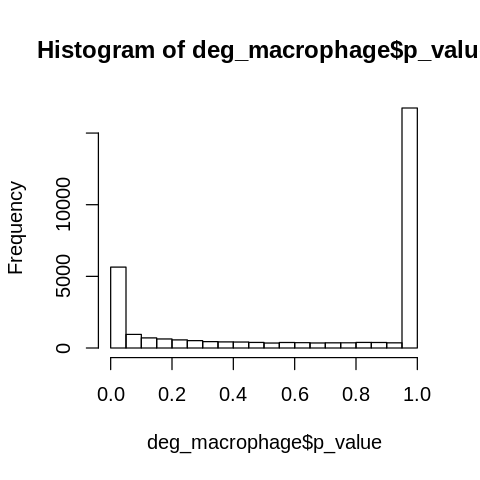

In [8]:
# p-valueの分布を確認する
hist(deg_macrophage$p_value)

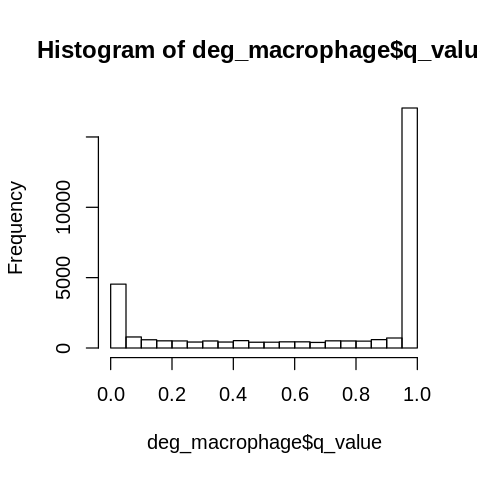

In [9]:
# q-valueの分布を確認する
hist(deg_macrophage$q_value)

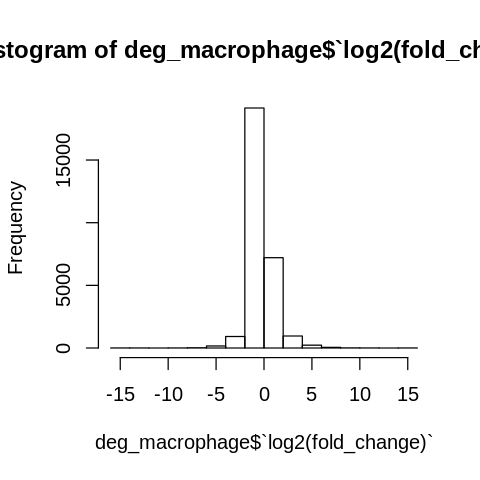

In [10]:
# `log2(fold_change)`の分布を確認する
hist(deg_macrophage$`log2(fold_change)`)

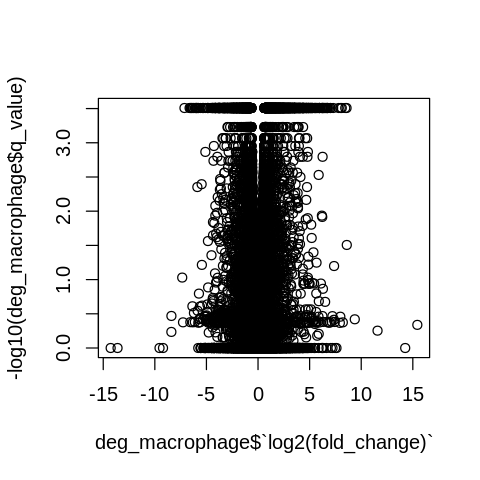

In [11]:
# log2FC と q_valueの関係を眺めてみる (volcano plot)
plot(deg_macrophage$`log2(fold_change)`, -log10(deg_macrophage$q_value))

## 発現変動遺伝子の数を数える


- "intratumoral macrophages express increased cathepsin K, COX-2, MMP-9, PDGF-B, uPA, VEGFA, and HGF (Wang et al., 2011)"
    - Wang et al., 2011 http://www.sciencedirect.com/science/article/pii/S0169500211002546

In [12]:
# 腫瘍組織内マクロファージで多い (FC > 1.5, q_value < 0.1) 遺伝子の数は？
deg_macrophage %>% filter(`log2(fold_change)` > log2(1.5), q_value < 0.1) %>% nrow

[1] 2324

In [13]:
# ポジコンがとれるかの確認 (生物学的なQC)
deg_macrophage %>% filter(`log2(fold_change)` > log2(1.5), q_value < 0.1) %>% filter(gene_id == "Vegfa")
deg_macrophage %>% filter(`log2(fold_change)` > log2(1.5), q_value < 0.1) %>% filter(gene_id == "Mmp9")

gene_id,value_1,value_2,log2(fold_change),p_value,q_value
Vegfa,7.99474,167.936,4.39272,5e-05,0.000310039


gene_id,value_1,value_2,log2(fold_change),p_value,q_value
Mmp9,0.0888962,6.75021,6.24667,5e-05,0.000310039


In [14]:
# 正常組織内マクロファージで多い (FC > 1/1.5, q_value < 0.1) の遺伝子の数は？
deg_macrophage %>% filter(`log2(fold_change)` > -log2(1.5), q_value < 0.1) %>% nrow

[1] 3334

------

------

------


# 本番

## 腫瘍組織内間質細胞で発現上昇する遺伝子のリストを得る

In [15]:
# 例として野生型と腫瘍のマクロファージで発現変動検定をした結果を読み込みます
deg_macrophage = read_tsv("data/CCCExplorer/CD11CB_output/gene_exp.diff")

# 行数と列数
dim(deg_macrophage)

# 使いたい列だけにする
deg_macrophage %<>% select(gene_id, value_1, value_2, `log2(fold_change)`, p_value, q_value)

# データの中身の確認
deg_macrophage %>% head

Parsed with column specification:
cols(
  test_id = col_character(),
  gene_id = col_character(),
  gene = col_character(),
  locus = col_character(),
  sample_1 = col_character(),
  sample_2 = col_character(),
  status = col_character(),
  value_1 = col_double(),
  value_2 = col_double(),
  `log2(fold_change)` = col_double(),
  test_stat = col_double(),
  p_value = col_double(),
  q_value = col_double(),
  significant = col_character()
)


[1] 30743    14

gene_id,value_1,value_2,log2(fold_change),p_value,q_value
0610005C13Rik,0.0725212,0.0442820,-0.7116840,1.00000,1.000000
0610007C21Rik,50.2687000,47.8496000,-0.0711526,0.71855,0.839597
0610007N19Rik,0.2385150,0.0629525,-1.9217400,1.00000,1.000000
0610007P08Rik,3.5743600,3.1124300,-0.1996430,0.36160,0.542589
0610007P14Rik,11.6356000,10.5723000,-0.1382470,0.54570,0.711416
0610007P22Rik,8.7388000,6.8487500,-0.3515960,0.21480,0.380104


In [16]:
# とある条件で腫瘍組織内間質細胞で発現上昇する遺伝子をフィルタリング
deg_macrophage_tumor = deg_macrophage %>% filter(value_2 > 2 ,`log2(fold_change)` > log2(1.5), q_value < 0.1)

# 何行 (何遺伝子)
deg_macrophage_tumor %>% nrow

[1] 1921

## 腫瘍細胞で発現する遺伝子のリストを得る


In [17]:
# 遺伝子発現量 (FPKM) をまとめた表を読み込む (Cufflinksの出力だとおもう)
fpkm_epi = read_tsv("data/CCCExplorer/EP_output/genes.read_group_tracking")

# 何行何列か
dim(fpkm_epi)

# データの最初の数行をみる
fpkm_epi %>% head

# 必要な列だけにする
fpkm_epi %<>% select(tracking_id, FPKM)

# 確認
fpkm_epi %>% head

Parsed with column specification:
cols(
  tracking_id = col_character(),
  condition = col_character(),
  replicate = col_integer(),
  raw_frags = col_double(),
  internal_scaled_frags = col_double(),
  external_scaled_frags = col_double(),
  FPKM = col_double(),
  effective_length = col_character(),
  status = col_character()
)


[1] 184458      9

tracking_id,condition,replicate,raw_frags,internal_scaled_frags,external_scaled_frags,FPKM,effective_length,status
0610005C13Rik,q1,1,11,12.99970,12.99970,0.499583,-,OK
0610005C13Rik,q1,0,3,4.10373,4.10373,0.122142,-,OK
0610005C13Rik,q1,2,0,0.00000,0.00000,0.000000,-,OK
0610005C13Rik,q2,1,14,12.69620,12.69620,0.377883,-,OK
0610005C13Rik,q2,0,12,8.66261,8.66261,0.257830,-,OK
0610005C13Rik,q2,2,19,14.06290,14.06290,0.418561,-,OK


tracking_id,FPKM
0610005C13Rik,0.499583
0610005C13Rik,0.122142
0610005C13Rik,0.000000
0610005C13Rik,0.377883
0610005C13Rik,0.257830
0610005C13Rik,0.418561


In [18]:
# とある条件で腫瘍細胞で発現する遺伝子をフィルタリング
fpkm_epi_tumor = fpkm_epi %>% filter(FPKM > 2)

# 何行 (何遺伝子)
fpkm_epi_tumor %>% nrow

[1] 72437

## ヒト-マウスのオーソログ関係の取得

`data/CCCExplorer/HOM_MouseHumanSequence.rpt` は Mouse Genome Informatics database から取得されたヒト-マウスオーソログリスト

In [19]:
# データの読み込み
dfhom = read_tsv("data/CCCExplorer/HOM_MouseHumanSequence.rpt")

# 何行何列
dim(dfhom)

# データの頭をみる
head(dfhom)

Parsed with column specification:
cols(
  `HomoloGene ID` = col_integer(),
  `Common Organism Name` = col_character(),
  `NCBI Taxon ID` = col_integer(),
  Symbol = col_character(),
  `EntrezGene ID` = col_integer(),
  `Mouse MGI ID` = col_character(),
  `HGNC ID` = col_character(),
  `OMIM Gene ID` = col_integer(),
  `Genetic Location` = col_character(),
  `Genomic Coordinates (mouse: GRCm38, human: GRCh37.p10)` = col_character(),
  `Nucleotide RefSeq IDs` = col_character(),
  `Protein RefSeq IDs` = col_character(),
  `SWISS_PROT IDs` = col_character()
)


[1] 39522    13

HomoloGene ID,Common Organism Name,NCBI Taxon ID,Symbol,EntrezGene ID,Mouse MGI ID,HGNC ID,OMIM Gene ID,Genetic Location,"Genomic Coordinates (mouse: GRCm38, human: GRCh37.p10)",Nucleotide RefSeq IDs,Protein RefSeq IDs,SWISS_PROT IDs
3,"mouse, laboratory",10090,Acadm,11364,MGI:87867,NA,NA,Chr3 78.77 cM,Chr3:153922357-153944632(-),NM_007382,NP_031408,P45952
3,human,9606,ACADM,34,NA,HGNC:89,607008,Chr1 p31,Chr1:76190043-76229355(+),"NM_000016,NM_001127328","NP_000007,NP_001120800,XP_005270868,XP_005270869,XP_005270870,XP_005270871",P11310
5,"mouse, laboratory",10090,Acadvl,11370,MGI:895149,NA,NA,Chr11 42.96 cM,Chr11:70010183-70015411(-),NM_017366,NP_059062,P50544
5,human,9606,ACADVL,37,NA,HGNC:92,609575,Chr17 p13.1,Chr17:7120444-7128586(+),"NM_000018,NM_001033859,NM_001270447,NM_001270448","NP_000009,NP_001029031,NP_001257376,NP_001257377",P49748
6,"mouse, laboratory",10090,Acat1,110446,MGI:87870,NA,NA,Chr9 29.12 cM,Chr9:53580522-53610382(-),NM_144784,NP_659033,Q8QZT1
6,human,9606,ACAT1,38,NA,HGNC:93,607809,Chr11 q22.3,Chr11:107992258-108018895(+),NM_000019,NP_000010,P24752


In [20]:
# 関係ありそうなところだけにする
dfhom %<>% select(`HomoloGene ID`, Symbol, `Common Organism Name`)

# 確認
dfhom %>% head

HomoloGene ID,Symbol,Common Organism Name
3,Acadm,"mouse, laboratory"
3,ACADM,human
5,Acadvl,"mouse, laboratory"
5,ACADVL,human
6,Acat1,"mouse, laboratory"
6,ACAT1,human


実は上の表は 1対1オーソログだけでなく、1対多オーソログも含まれていたので、ちょっと面倒です。
このような場合、1対1オーソログのみに絞ることもありますし、全部残す場合もあります。ケースバイケース。

いずれにせよ、上の形では扱いづらいので、ヒトとマウスのオーソログの対応が1行ごとに並んだ形にしましょう。

In [21]:
# マウスの行とヒトの表をそれぞれ抜き出し、 `full_join` で joinしている
dfhom2 = full_join(
    dfhom %>%
        filter(`Common Organism Name` == "mouse, laboratory") %>%
        select(-`Common Organism Name`),
    dfhom %>% 
        filter(`Common Organism Name` == "human") %>%
        select(-`Common Organism Name`),
    by = "HomoloGene ID"
)

# 列名を変更する
dfhom2 %<>% dplyr::rename(mouse=Symbol.x, human=Symbol.y)

# 何行何列
dfhom2 %>% dim

# データの頭
dfhom2 %>% head

[1] 22894     3

HomoloGene ID,mouse,human
3,Acadm,ACADM
5,Acadvl,ACADVL
6,Acat1,ACAT1
7,Acvr1,ACVR1
9,Sgca,SGCA
12,Adsl,ADSL


## リガンド-受容体関係のデータ

（実は`From` がリガンドで、 `To` が受容体）

In [22]:
# 読み込み
dflr = read_tsv("data/CCCExplorer/LR_manual_revised.txt")

# 何行何列
dflr %>% dim

# 頭
dflr %>% head

Parsed with column specification:
cols(
  From = col_character(),
  To = col_character()
)


[1] 1427    2

From,To
CCK,CCKAR
GAST,CCKBR
GRP,GRPR
IL17F,IL17RA
NTN1,DSCAM
SEMA3A,PLXNA1


## 遺伝子のリストとヒト-マウスオーソログの表を結合する

遺伝子のリストとヒト-マウスオーソログの表を結合することで、マウスの遺伝子リストであってもヒトの遺伝子に関するデータベースの情報と照合することができるようになります。

そのために、JOIN をします。JOINは２つの表x, yそれぞれの列を比較し、x,yを結合した新しい表を作る操作です。

比較する列をキーと呼びます。表 x, y のキーがユニークで同一であれば単に横に連結すればいいですが、実際には、xもしくはyまたは両方で足りない/余分なキーがある場合があり、そのような場合にどう処理するかによって、JOINに様々な種類があります。

- join について https://qiita.com/matsuou1/items/b1bd9778610e3a586e71

In [23]:
# ヒト-マウスオーソログ関係の表と遺伝子リスト表を結合する
## `left_join` は一番目の表（データフレーム) の行は全部残して、JOINを行う
deg_macrophage_tumor_human = left_join(deg_macrophage_tumor, dfhom2, by=c("gene_id" = "mouse"))

# head
## deg_macrophage_tumor にあっても dfhom2 になかった列では、 `HomoloGene ID`やhumanが欠損値 (NA) になっている
deg_macrophage_tumor_human %>% head

# human が NA でないの行だけにする
deg_macrophage_tumor_human　%<>% filter(!is.na(human))

deg_macrophage_tumor_human %>% head

gene_id,value_1,value_2,log2(fold_change),p_value,q_value,HomoloGene ID,human
0610010O12Rik,4.19646,8.98632,1.098560,0.00095,0.004437260,NA,NA
0610031J06Rik,95.85410,144.76100,0.594760,0.00020,0.001113440,10562,C1orf85
0610040J01Rik,1.49871,3.08289,1.040560,0.00420,0.016218300,49537,C4orf19
1110002B05Rik,39.23150,69.53890,0.825809,0.00005,0.000310039,NA,NA
1110003E01Rik,20.49960,34.26780,0.741253,0.00005,0.000310039,NA,NA
1110007C09Rik,22.56080,77.52120,1.780770,0.00005,0.000310039,12269,C9orf89


gene_id,value_1,value_2,log2(fold_change),p_value,q_value,HomoloGene ID,human
0610031J06Rik,95.854100,144.76100,0.594760,0.00020,0.001113440,10562,C1orf85
0610040J01Rik,1.498710,3.08289,1.040560,0.00420,0.016218300,49537,C4orf19
1110007C09Rik,22.560800,77.52120,1.780770,0.00005,0.000310039,12269,C9orf89
1700025G04Rik,1.123720,2.19438,0.965534,0.00350,0.013889500,12776,C1orf21
1700026D08Rik,0.584625,4.63796,2.987910,0.00005,0.000310039,12605,C15orf26
1810043G02Rik,7.011670,12.39670,0.822125,0.00250,0.010369000,3619,C21orf2


In [24]:
# ヒト-マウスオーソログ関係の表と遺伝子リスト表を結合する
fpkm_epi_tumor_human = left_join(fpkm_epi_tumor, dfhom2, by=c("tracking_id" = "mouse"))

# head
fpkm_epi_tumor_human %>% head

# human が NA でないの行だけにする
fpkm_epi_tumor_human　%<>% filter(!is.na(human))

# 何行何列
fpkm_epi_tumor_human %>% dim

fpkm_epi_tumor_human　%>% head

tracking_id,FPKM,HomoloGene ID,human
0610007C21Rik,46.5889,NA,NA
0610007C21Rik,63.4719,NA,NA
0610007C21Rik,80.0110,NA,NA
0610007C21Rik,59.6297,NA,NA
0610007C21Rik,49.4234,NA,NA
0610007C21Rik,51.7633,NA,NA


[1] 62264     4

tracking_id,FPKM,HomoloGene ID,human
0610007P14Rik,23.5014,38284,C14orf1
0610007P14Rik,33.9843,38284,C14orf1
0610007P14Rik,24.8046,38284,C14orf1
0610007P14Rik,25.0812,38284,C14orf1
0610007P14Rik,21.5133,38284,C14orf1
0610007P14Rik,21.9958,38284,C14orf1


## リガンド-受容体関係の情報に発現/発現変動遺伝子の情報を加える

`A %in% B` はAの各要素がBに含まれるかをTRUE/FALSEのベクトルで返す関数です。

In [25]:
# ligand_up_in_tumor_macrophage という列を追加する。deg_macrophage_tumor_human に リガンドが含まれるならばTRUE、そうでないならばFALSSEとなる
## 
dflr %<>% mutate(ligand_up_in_tumor_macrophage = From %in% deg_macrophage_tumor_human$human)

# head
dflr %>% head

# ligand_up_in_tumor_macrophage の数を集計
dflr %>% group_by(ligand_up_in_tumor_macrophage) %>% summarise(n = n())

From,To,ligand_up_in_tumor_macrophage
CCK,CCKAR,FALSE
GAST,CCKBR,FALSE
GRP,GRPR,FALSE
IL17F,IL17RA,FALSE
NTN1,DSCAM,FALSE
SEMA3A,PLXNA1,FALSE


ligand_up_in_tumor_macrophage,n
FALSE,1255
TRUE,172


In [26]:
# receptor_expressed_in_tumor_macrophage という列を追加する。fpkm_epi_tumor_human に 受容体が含まれるならばTRUE、そうでないならばFALSSEとなる
## 
dflr %<>% mutate(receptor_expressed_in_tumor_macrophage = To %in% fpkm_epi_tumor_human$human)

# head
dflr %>% head

# receptor_expressed_in_tumor_macrophage の数を集計
dflr %>% group_by(receptor_expressed_in_tumor_macrophage) %>% summarise(n = n())

From,To,ligand_up_in_tumor_macrophage,receptor_expressed_in_tumor_macrophage
CCK,CCKAR,FALSE,TRUE
GAST,CCKBR,FALSE,FALSE
GRP,GRPR,FALSE,FALSE
IL17F,IL17RA,FALSE,TRUE
NTN1,DSCAM,FALSE,FALSE
SEMA3A,PLXNA1,FALSE,TRUE


receptor_expressed_in_tumor_macrophage,n
FALSE,426
TRUE,1001


In [27]:
# `ligand_up_in_tumor_macrophage` と  `receptor_expressed_in_tumor_macrophage` が両方TRUEである行を探す
dflr_pair = dflr %>% filter(ligand_up_in_tumor_macrophage == TRUE, receptor_expressed_in_tumor_macrophage == TRUE)

# dim
dflr_pair %>% dim

# head
dflr_pair %>% head

[1] 129   4

From,To,ligand_up_in_tumor_macrophage,receptor_expressed_in_tumor_macrophage
B2M,HFE,TRUE,TRUE
C3,ITGB2,TRUE,TRUE
C3,ITGAX,TRUE,TRUE
CREG1,IGF2R,TRUE,TRUE
GAS6,TYRO3,TRUE,TRUE
GAS6,AXL,TRUE,TRUE


先行研究で、腫瘍組織内マクロファージで発現上昇が見られるリガンドも入っていた

- "intratumoral macrophages express increased cathepsin K, COX-2, MMP-9, PDGF-B, uPA, VEGFA, and HGF (Wang et al., 2011)"
    - Wang et al., 2011 http://www.sciencedirect.com/science/article/pii/S0169500211002546

In [28]:
dflr_pair %>% filter(From == "HGF")

From,To,ligand_up_in_tumor_macrophage,receptor_expressed_in_tumor_macrophage
HGF,MET,TRUE,TRUE


## とりたいものがとれてきているか可視化して確認

GEOのFPKMの発現量行列を用いて、上の方法でとってきたリガンドレセプターのペアが本当に

- 腫瘍組織内マクロファージで多いリガンドか？
- 腫瘍細胞で発現している受容体か？

ということを確かめました。

GEOのデータはあらかじめダウンロードしておきました。

GEOのページのメタデータをみないとわからないのですが、Tum1, Tum2, Tum3 が腫瘍組織内マクロファージ、WT1, WT2が野生型組織でのマクロファージ、Tum9, Tum10, Tum11が腫瘍細胞です。

In [29]:
# データの読み込み
df_fpkm = read_tsv("data/GSE59831_processed_data_FPKM.txt")

# dim
df_fpkm %>% dim

# 様子を見る
df_fpkm %>% head

# 列名だけを表示
df_fpkm %>% colnames

Parsed with column specification:
cols(
  .default = col_double(),
  mice_gene_symbol = col_character(),
  human_gene_symbol = col_character()
)
See spec(...) for full column specifications.


[1] 16024    29

mice_gene_symbol,human_gene_symbol,Tum1,Tum2,Tum3,WT1,WT2,Tum4,Tum5,WT3,⋯,Tum11,WT8,WT9,WT10,Tum12,Tum13,Tum14,WT11,WT12,WT13
0610007P14Rik,C14orf1,9.31368,10.13680,12.26660,11.92950,11.34170,10.45680,10.44590,13.05840,⋯,21.99580,33.98430,23.50140,24.80460,17.16570,12.51170,16.03630,14.69160,14.03290,14.20440
0610009D07Rik,SF3B14,25.35280,32.25990,26.61000,29.73440,37.16520,37.57330,30.74340,32.30680,⋯,28.76030,21.51540,30.83840,19.26180,35.14690,33.53620,42.73760,29.27860,29.37960,28.06600
0610009O20Rik,KIAA0141,12.45760,10.17690,11.95220,10.62740,7.04763,9.63765,11.11900,13.35890,⋯,20.57930,18.12230,18.65090,18.58170,15.60410,15.34920,13.04400,16.76130,15.91300,18.05510
0610010F05Rik,KIAA1841,5.84091,6.54488,6.65366,4.80074,6.06263,5.57042,5.21223,5.56449,⋯,8.04684,5.92199,6.23551,4.73364,5.98708,4.26902,4.16373,3.47511,3.71875,3.95344
0610010K14Rik,C17orf49,25.63690,24.08560,20.17560,25.34280,29.14040,31.46110,28.30990,22.17650,⋯,18.00200,24.00260,21.85860,23.72630,28.46520,31.19330,26.40880,32.53430,26.93620,29.38080
0610011F06Rik,C16orf13,3.48174,5.79169,3.73809,5.94575,5.98899,9.04125,5.84235,7.36357,⋯,42.61460,38.91730,33.56900,37.34490,20.33750,18.81900,14.17990,14.93870,16.12340,13.39220


[1] "mice_gene_symbol"  "human_gene_symbol" "Tum1"             
 [4] "Tum2"              "Tum3"              "WT1"              
 [7] "WT2"               "Tum4"              "Tum5"             
[10] "WT3"               "WT4"               "Tum6"             
[13] "Tum7"              "Tum8"              "WT5"              
[16] "WT6"               "WT7"               "Tum9"             
[19] "Tum10"             "Tum11"             "WT8"              
[22] "WT9"               "WT10"              "Tum12"            
[25] "Tum13"             "Tum14"             "WT11"             
[28] "WT12"              "WT13"

[1] 46  8

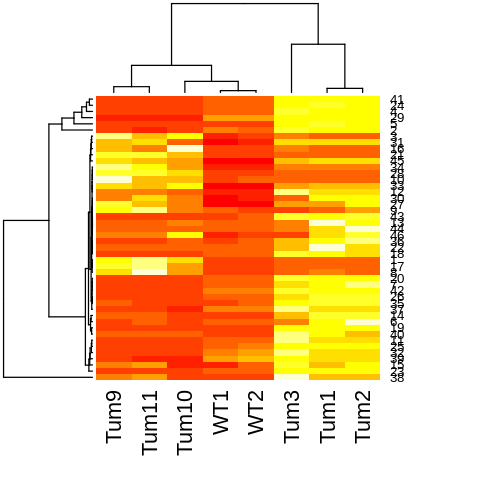

In [30]:
# リガンドだけを可視化
## うまくいっているなら、Tum1, Tum2, Tum3 (腫瘍組織内マクロファージ)で多く、WT1, WT2 (野生型) で少ない

# dflr_pair に含まれるリガンドだけに絞り、 as.matrix　で行列にする
x = df_fpkm %>% 
        select(human_gene_symbol, Tum1, Tum2, Tum3, WT1, WT2, Tum9, Tum10, Tum11) %>%
        filter(human_gene_symbol %in% dflr_pair$From) %>% 
        select(-human_gene_symbol) %>% 
        as.matrix()

# 何行何列
dim(x)

# ヒートマップをプロット
heatmap(x, Colv = FALSE)

[1] 73  8

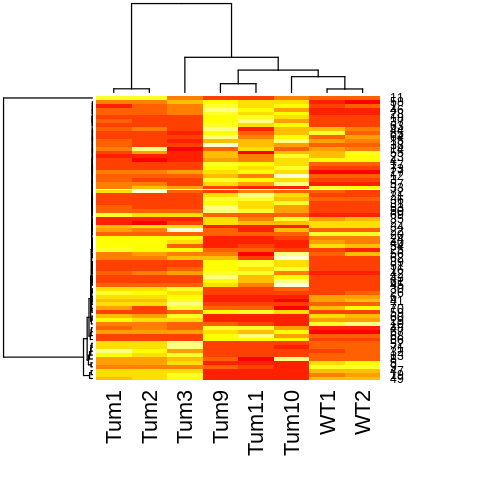

In [31]:
# 受容体だけを可視化
## うまくいっているなら、Tum9, Tum10, Tum11 で多い

# dflr_pair に含まれるリガンドだけに絞り、 as.matrix　で行列にする
x = df_fpkm %>% 
        select(human_gene_symbol, Tum1, Tum2, Tum3, WT1, WT2, Tum9, Tum10, Tum11) %>%
        filter(human_gene_symbol %in% dflr_pair$To) %>% 
        select(-human_gene_symbol) %>% 
        as.matrix()

# 何行何列
dim(x)

# ヒートマップをプロット
heatmap(x, Colv = FALSE)


----

----

----


## このあとどうするか？

今のままでは、候補がかなり多いため、仮説を検証する実験をするのは難しそうです。また、この予測がどのくらい正しいのかも不明です。

元論文では、このリガンド-受容体ペアを足がかりに、以下のような解析をします。

- 受容体の下流のシグナル伝達経路から転写因子があるか探す（パスウェイデータベースを参照する）
- それらの下流の転写因子がターゲットとする遺伝子を探す（パスウェイデータベースや遺伝子制御関係のデータベースを参照する）
- それらのターゲット遺伝子群にランダムに比べて発現変動遺伝子が濃縮しているかを調べる（統計検定）

このような解析を加えることで、単にリガンドと受容体が共起だけでなく、さらに信頼性のあるペアを探すことができます。

ちなみに、著者らはこの方法をCCCExplorerと名付けています。詳しくは元の論文をご覧ください:

- Toi _et al_., Transcriptome Analysis of Individual Stromal Cell Populations Identifies Stroma-Tumor Crosstalk in Mouse Lung Cancer Model, Cell Reports (2015) http://dx.doi.org/10.1016/j.celrep.2015.01.040 


## 小まとめ

このようにIDによる統合を繰り返すだけでもいろいろな仮説を立てられます。また、NGS解析とは言いつつ、NGSデータ以外の生命科学データを合わせることで、単なる発現変動遺伝子のリストよりも深い知見が得られるうることがみえてきたかと思います。
